# Pymaceuticals Inc.
---

### Analysis
1. Observation: as the timepoint increases, tumor volumes drastically decrease which indicates the success of the drug treatment. Additionally, we could compare line grpahs of timepoints and tumor volume for each drug to illustrate which is more quickly successful. 
2. Observation: We can see with the linear regression and scatter plot that there seems to be a coorelation between the weight of the mice and the size of their tumor, which indicates that in some of the mice cases the more they weigh the higher chace they have to develop a more aggressive tumor. 
3. Observation: From the box plot we can see that infubinol and ceftamin had higher final tumor volumes at the end of the treatment which could indicate that these drugs were less effective in treating the size of the tumor. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID'])

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = combined_data['Mouse ID'].unique()
mouse_count = len(mouse_count)
mouse_count 

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_data = combined_data[combined_data[['Mouse ID','Timepoint']].duplicated()]
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = False,
                                          inplace = False, ignore_index = False)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_data['Mouse ID'].unique()
mice_count = len(mice_count)
mice_count 


#248

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM_tumor = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_data = pd.DataFrame({
    'Mean Tumor Volume' : mean_tumor,
    'Median Tumor Volume' : median_tumor,
    'Tumor Volume Variance' : variance_tumor,
    'Tumor Volume Std. Dev.' : std_tumor,
    'Tumor Volume Std. Err.' : SEM_tumor})
summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_data = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([ "mean", 'median', 'var', "std", 'sem'])

stats_data


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

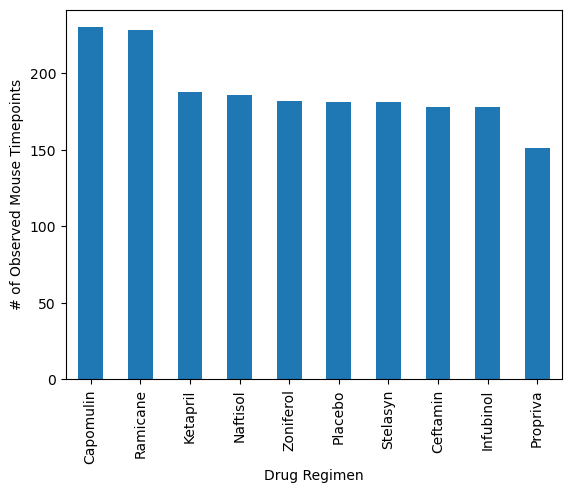

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
xaxis = clean_data.groupby(['Drug Regimen'])['Mouse ID'].count()
#yaxis = clean_data['Drug Regimen'].unique()
xaxis = xaxis.sort_values(ascending = False )

bargraph = xaxis.plot( kind = 'bar', )
bargraph.set_ylabel('# of Observed Mouse Timepoints')



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

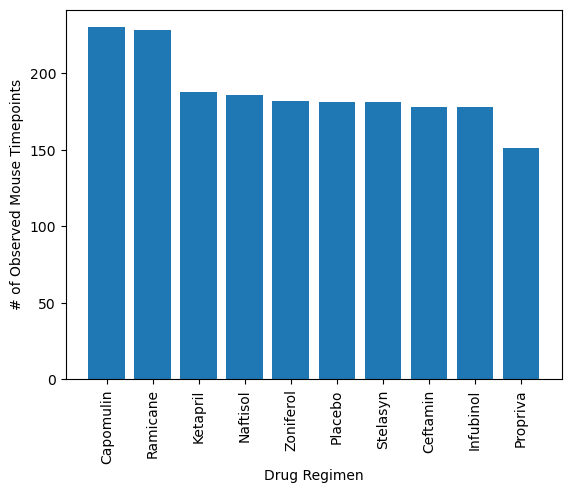

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xaxis = clean_data.groupby(['Drug Regimen'])['Mouse ID'].count()
xaxis = xaxis.sort_values(ascending = False )
yaxis = xaxis.index

plt.bar(yaxis, xaxis)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')


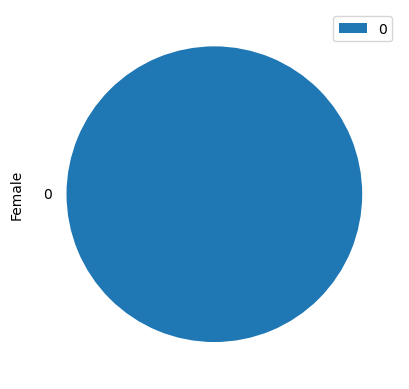

In [89]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_mice = clean_data.groupby(['Sex'])['Mouse ID'].count()
male_per = (gender_mice['Male']/gender_mice.sum())*100
female_per = (gender_mice['Female']/gender_mice.sum())*100
data_df = pd.DataFrame({
    'Male': [male_per],
    'Female' :[female_per]})

piechart= data_df.plot(y='Female',kind='pie')

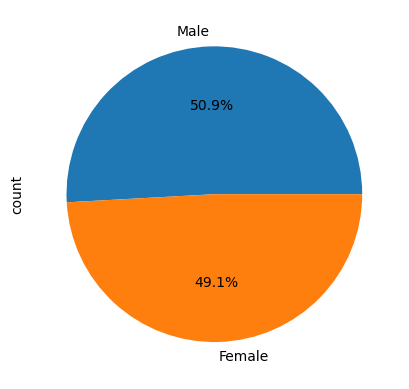

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_mice = clean_data.groupby(['Sex'])['Mouse ID'].count()
labels = [ 'Male', 'Female']
male_per = (gender_mice['Male']/gender_mice.sum())*100
female_per = (gender_mice['Female']/gender_mice.sum())*100
size = [male_per, female_per]


# Make the pie chart
plt.pie(size, labels=labels, autopct='%1.1f%%', shadow=False)
plt.ylabel('count')
plt.show()




## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin')]
ramicane = clean_data.loc[(clean_data['Drug Regimen'] == 'Ramicane')]
infubinol = clean_data.loc[(clean_data['Drug Regimen'] == 'Infubinol')]
ceftamin = clean_data.loc[(clean_data['Drug Regimen'] == 'Ceftamin')]


# Start by getting the last (greatest) timepoint for each mouse
mouse_time = clean_data.groupby('Mouse ID')[['Timepoint']].max()
 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_timepoint = pd.merge(mouse_time, clean_data, on =('Mouse ID', 'Timepoint'), how='left')
merge_timepoint.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
druglist = [capomulin['Tumor Volume (mm3)'], ramicane['Tumor Volume (mm3)'], infubinol['Tumor Volume (mm3)'], ceftamin['Tumor Volume (mm3)']]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in druglist:
    quartiles = drug.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_data.append(lower_bound)
    tumor_data.append(upper_bound)
    print(f'{drug}s potential outliers: {lower_bound, upper_bound}')
    

0       45.000000
226     45.000000
227     45.000000
228     45.000000
229     45.000000
          ...    
1854    40.728578
1859    38.125164
1878    47.685963
1888    41.581521
1889    31.023923
Name: Tumor Volume (mm3), Length: 230, dtype: float64s potential outliers: (26.714832162499995, 55.9711007025)
58      45.000000
59      45.000000
60      45.000000
61      45.000000
62      45.000000
          ...    
1867    40.667713
1870    29.128472
1874    37.225650
1879    32.978522
1885    33.562402
Name: Tumor Volume (mm3), Length: 228, dtype: float64s potential outliers: (24.1865864625, 57.488048122500004)
29      45.000000
30      45.000000
31      45.000000
32      45.000000
33      45.000000
          ...    
1789    66.196912
1794    66.083066
1802    62.435404
1804    67.973419
1806    60.918767
Name: Tumor Volume (mm3), Length: 178, dtype: float64s potential outliers: (32.309217298749985, 72.31757996875001)
170     45.000000
171     45.000000
172     45.000000
173     45.0000

{'whiskers': [<matplotlib.lines.Line2D at 0x16d8d8070>,
 'caps': [<matplotlib.lines.Line2D at 0x16d8d85b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d8afd90>,
 'medians': [<matplotlib.lines.Line2D at 0x16d8d8a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x16d8d8d30>,
 'means': []}

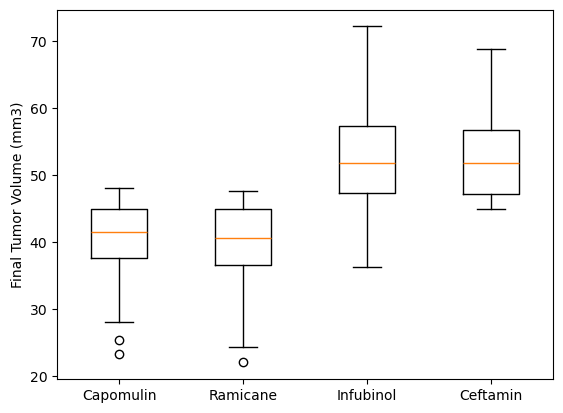

In [61]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(druglist, labels = names)

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint (days)')

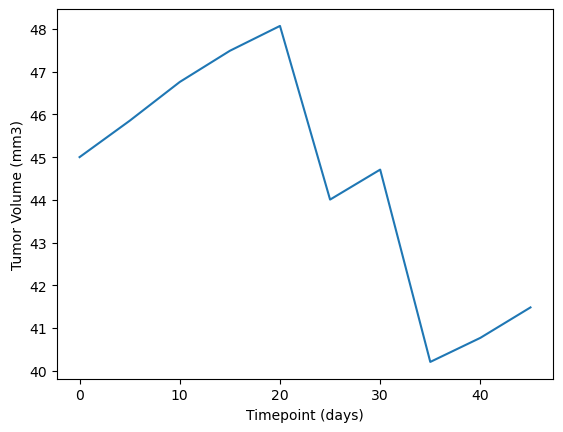

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

df = clean_data.set_index('Timepoint')
mousel509 = df.loc[(df['Mouse ID'] == 'l509') & (df['Drug Regimen'] == 'Capomulin')]
mouse_timepoints = mousel509['Tumor Volume (mm3)']
plt.plot(mouse_timepoints)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")

Text(0.5, 0, 'Weight (g)')

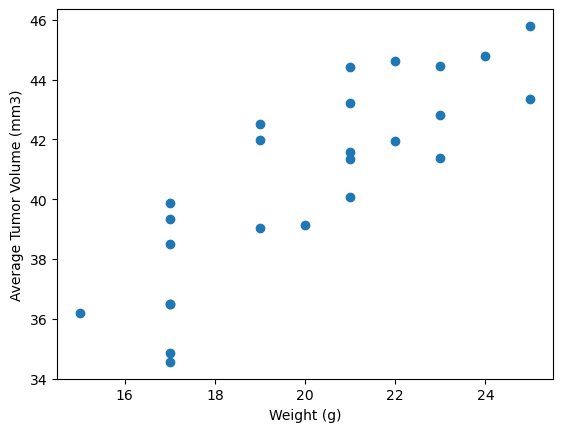

In [72]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin')] 
capomulin
#groupby .mean
avg_vol = capomulin.groupby(['Mouse ID'])[['Tumor Volume (mm3)', 'Weight (g)']].mean()
avg_vol
plt.scatter(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


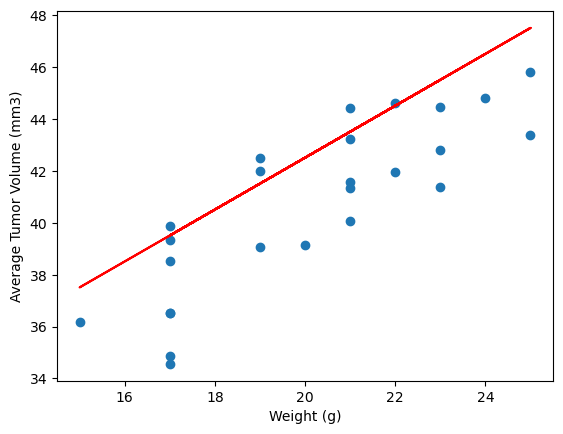

In [87]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
correlation = st.pearsonr(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
regress_values = avg_vol['Weight (g)'] + slope + intercept 
plt.plot(avg_vol['Weight (g)'], regress_values, 'r-')



      